<a href="https://colab.research.google.com/github/ahammedshaneebnk/ML_Parameter_Estimation/blob/main/exercise_2_maximum_a_posteriori_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maximum A Posteriori Estimation (MAP) for Normally Distributed Data with Normal Prior**

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# function to plot the distribution
def plot_pdf(x, mu, sigma, lw=1):
  plt.plot(x, 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)),
             linewidth=lw)

max log likelihood = -70.15964156530461 when mu = -0.10101010101010077
max log prior = 0.2848925622253458 when mu = 0.5050505050505052
max map objective = -71.47149807943961 when mu = 0.020202020202020332


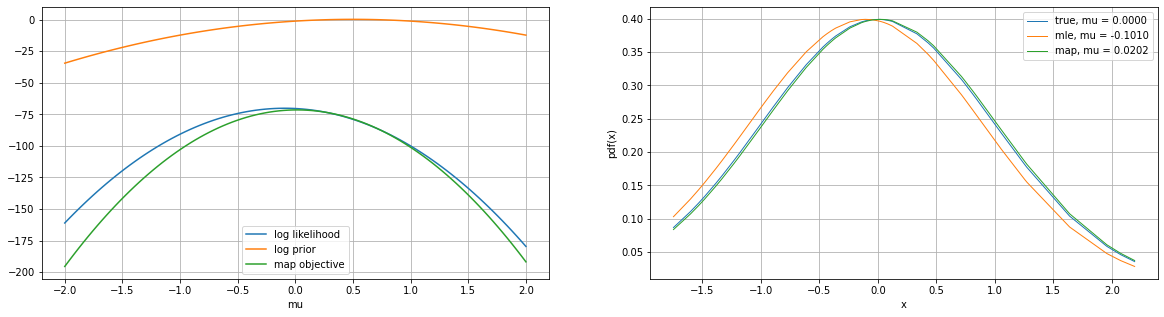

In [ ]:
# distribution parameters
mu = 0
sigma = 1
nu = .5
beta = .3

# function to return the map estimate
def get_mu_est_map(sample_size, mu, sigma, nu, beta):
  sample_data = np.random.normal(mu, sigma, sample_size)
  n_s = len(sample_data)
  mu_est_map = ((nu*sigma**2)+(n_s*np.mean(sample_data)*beta**2))/((sigma**2)+(n_s*beta**2))
  return mu_est_map

# log likelihood, log prior, map objective
plt.figure(1, [20, 5])
sample_data_map = np.random.normal(mu, sigma, 50)
sample_mean = np.mean(sample_data_map)
test_mus = np.linspace(-2, 2, 100)

# function to plot the log likelihood, log prior and map obective for range of values of mu
def get_all_plots_map(test_mus, sample_data, sample_mean):
  n = len(sample_data)
  log_likelihood = np.zeros(len(test_mus))
  log_prior = np.zeros(len(test_mus))
  map_objective = np.zeros(len(test_mus))

  for i in range(len(test_mus)):
    log_likelihood[i] = -n*np.log(sigma) -(n/2)*np.log(2*np.pi) - (1/(2*sigma**2))*sum((sample_data_map - test_mus[i])**2)
    log_prior[i] = -np.log(beta) -(1/2)*np.log(2*np.pi) -(1/(2*beta**2))*((nu - test_mus[i])**2)
    map_objective[i] = log_likelihood[i] + log_prior[i]

  plt.subplot(121)
  plt.plot(test_mus, log_likelihood)
  plt.plot(test_mus, log_prior)
  plt.plot(test_mus, map_objective)
  plt.legend(['log likelihood', 'log prior', 'map objective'])
  plt.grid('True')
  plt.xlabel('mu')
  mle_est = test_mus[np.argmax(log_likelihood)]
  map_est = test_mus[np.argmax(map_objective)]
  print(f"max log likelihood = {max(log_likelihood)} when mu = {mle_est}")
  print(f"max log prior = {max(log_prior)} when mu = {test_mus[np.argmax(log_prior)]}")
  print(f"max map objective = {max(map_objective)} when mu = {map_est}")

  plt.subplot(122)
  plot_pdf(np.sort(sample_data_map), mu, sigma)
  plot_pdf(np.sort(sample_data_map), mle_est, sigma)
  plot_pdf(np.sort(sample_data_map), map_est, sigma)
  plt.grid('True')
  plt.xlabel('x')
  plt.ylabel('pdf(x)')
  plt.legend(['true, mu = %.4f'%(mu), 'mle, mu = %.4f'%(mle_est), 'map, mu = %.4f'%(map_est)])

get_all_plots_map(test_mus, sample_data_map, sample_mean)

mle = -0.22700780711489527 and map = -0.4666013466939634
mle = 0.2580878990091417 and map = 0.14630136935522384
mle = -0.03435892350192838 and map = -0.09392380460793054
mle = -0.12150916095491762 and map = -0.15040902001714965
mle = 0.0172603133755161 and map = 0.01097601333384783


Text(0, 0.5, 'difference between mle and map')

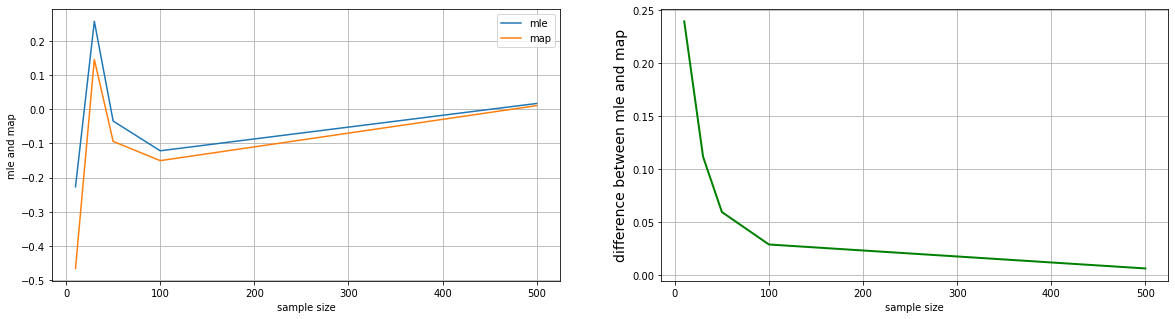

In [ ]:
# test with different samples
# function to get the mle and map
population = np.random.normal(mu, sigma, 2500)
def get_mu_est(sample_size):
  sample = np.random.choice(population, sample_size)
  mle_est = np.mean(sample)
  map_est = (mle_est*sample_size*beta**2 + nu*sigma**2) / (sigma**2 + sample_size*beta**2)
  print(f"mle = {mle_est} and map = {map_est}")
  return mle_est, map_est
  
test_sample_sizes = np.array([10, 30, 50, 100, 500])
mu_est_mle = np.zeros(len(test_sample_sizes))
mu_est_map = np.zeros(len(test_sample_sizes))

for i in range(len(test_sample_sizes)):
  mu_est_mle[i], mu_est_map[i] = get_mu_est(test_sample_sizes[i])

plt.figure(2, [20, 5])
plt.subplot(121)
plt.plot(test_sample_sizes, mu_est_mle)
plt.plot(test_sample_sizes, mu_est_map)
plt.legend(['mle', 'map'])
plt.grid('True')
plt.xlabel('sample size')
plt.ylabel('mle and map')

plt.subplot(122)
plt.plot(test_sample_sizes, abs(mu_est_mle - mu_est_map), linewidth=2, color='g')
plt.grid('True')
plt.xlabel('sample size')
plt.ylabel('difference between mle and map', fontsize=14)

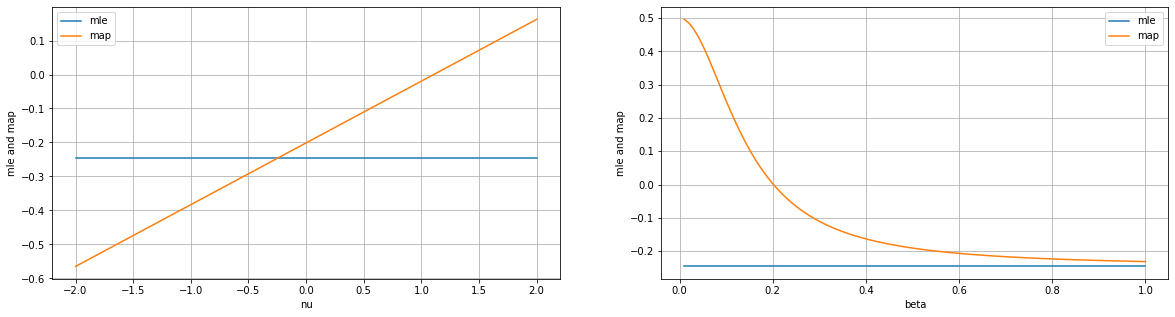

In [ ]:
# test with different prior parameters
test_nus = np.linspace(-2,2,100)
test_betas = np.linspace(.01, 1, 100)
sample = np.random.normal(mu, sigma, 50)

# function to get mle and map for different prior parameters
def get_mu_est(nu, beta):
  mle_est = sum(sample) / len(sample)
  map_est = (mle_est*len(sample)*beta**2 + nu*sigma**2) / (sigma**2 + len(sample)*beta**2)
  return mle_est, map_est

mu_est_map_nu = np.zeros(len(test_nus))
mu_est_mle_nu = np.zeros(len(test_nus))
mu_est_mle_beta = np.zeros(len(test_betas))
mu_est_map_beta = np.zeros(len(test_betas))

for i in range(len(test_nus)):
  mu_est_mle_nu[i], mu_est_map_nu[i] = get_mu_est(test_nus[i], beta)
for i in range(len(test_betas)):
  mu_est_mle_beta[i], mu_est_map_beta[i] = get_mu_est(nu, test_betas[i])

plt.figure(3, [20, 5])
plt.subplot(121)
plt.xlabel('nu')
plt.ylabel('mle and map')
plt.plot(test_nus, mu_est_mle_nu)
plt.plot(test_nus, mu_est_map_nu)
plt.legend(['mle', 'map'])
plt.grid('True')

plt.subplot(122)
plt.xlabel('beta')
plt.ylabel('mle and map')
plt.plot(test_betas, mu_est_mle_beta)
plt.plot(test_betas, mu_est_map_beta)
plt.legend(['mle', 'map'])
plt.grid('True')

plt.show()

**Output Plots**


> Log Likelihood, Log Prior and MAP Objective for range of means

> Comparison of Distribution with MLE and MAP


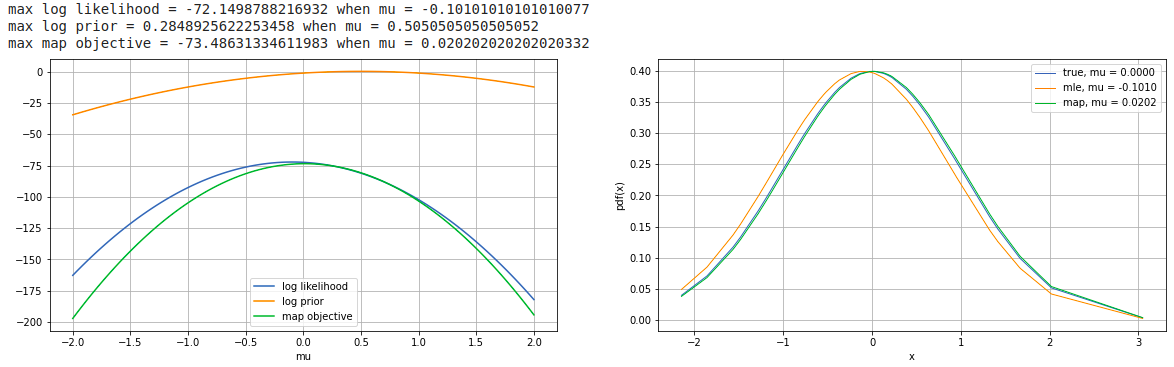


> Comparison of MLE and MAP with increasing number of samples


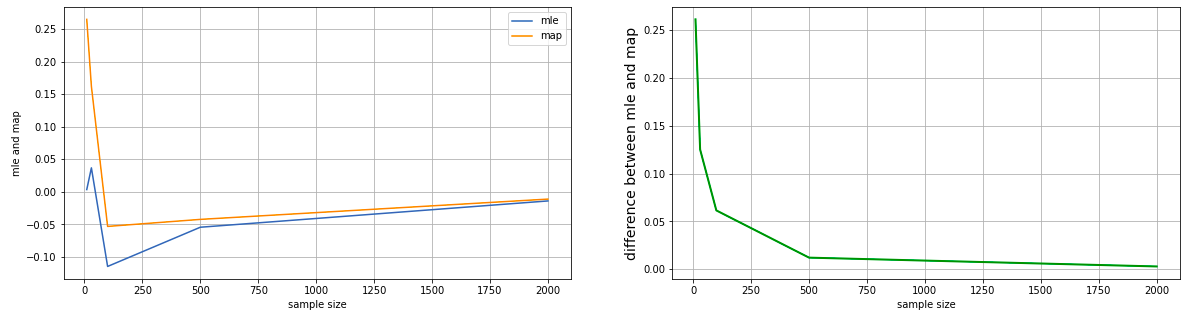


> MLE and MAP for varying nu and beta


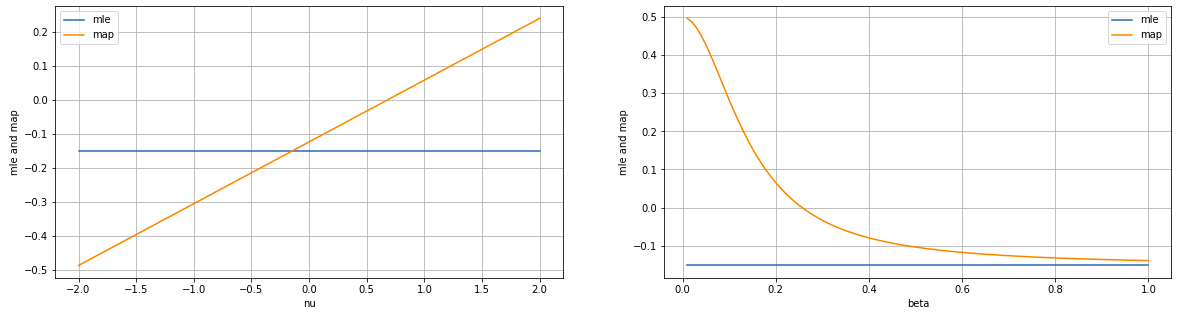

**Submitted By:**
> Ahammed Shaneeb N K

> M.Tech, Artificial Intelligence